# <span style = "color:coral"> Customer Behaviour Classification </span>

***

In this project, we will try to predict if the customer purchase the product or not using various machine learning models and Deploy the model with Tkinter library

## Contents

The data represents details about 400 clients of a company including the unique ID, the gender, the age of the customer and the salary. Besides this, we have collected information regarding the buying decision - weather the customer decided to buy specific products or not.

## Let's Begin

### Import all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read 'Customer_Behaviour.csv' dataset and store it in a dataframe variable

In [2]:
df=pd.read_csv("Customer_Behaviour.csv")

In [3]:
df["Purchased"].unique()

array([0, 1], dtype=int64)

### View the top 5 rows

In [3]:
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### View info of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


### View basic statistical information about the dataset

In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


### Check for any null values

In [6]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### View unique values in Gender

In [7]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

### Convert male to 0 and Female to 1 in Gender column

In [8]:
d={'Male':0,"Female":1}
df["Gender"]=df["Gender"].map(d)

In [9]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


#### Drop user ID column

In [10]:
df.drop("User ID",axis=1,inplace=True)

## <span style = "color: orange"> Data Visualization </span>

### Plot heatmap to view the correlation between features

<Axes: >

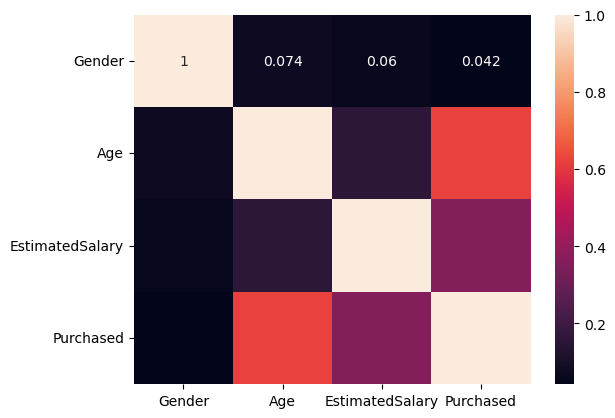

In [11]:
sns.heatmap(df.corr(),annot=True)

### Plot a countplot of gender with respect to purchased

In [12]:
df["Gender"]=df["Gender"].astype(str)
df["Purchased"]=df["Purchased"].astype(str)

<Axes: xlabel='Gender', ylabel='count'>

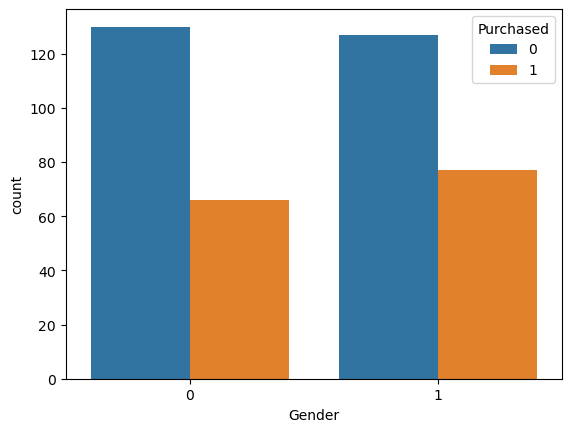

In [13]:
sns.countplot(df,x="Gender",hue="Purchased")

### Plot a displot of Age

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


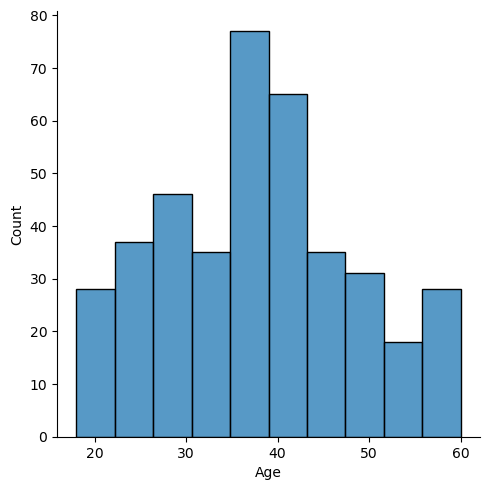

In [14]:
sns.displot(data=df,x="Age")

### Plot pairplot of the dataset

## Data Preprocessing

### Split the dataset into input and target variables

In [15]:
X=df.drop(columns=["Purchased"])
y=df["Purchased"]

### Scale the data using StandardScaler

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scale=StandardScaler()


In [18]:

xcol=X.columns

In [19]:
X=scale.fit_transform(X)

In [20]:
X=pd.DataFrame(data=X,columns=xcol)

In [21]:
X.head()

,Gender,Age,EstimatedSalary
0,-1.020204,-1.781797,-1.490046
1,-1.020204,-0.253587,-1.460681
2,0.980196,-1.113206,-0.785290
3,0.980196,-1.017692,-0.374182
4,-1.020204,-1.781797,0.183751


### Split the dataset into training and testing set

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=100)

### Check shape of X_train and X_test

In [24]:
X_train.shape

(320, 3)

In [25]:
X_test.shape

(80, 3)

## ML Models

### Logistic Regression Classifier

In [26]:
from sklearn.linear_model import LogisticRegression
from  sklearn import metrics
from sklearn.model_selection import cross_val_score

In [27]:
model=LogisticRegression()

In [28]:
model.fit(X_train,y_train)

LogisticRegression()

model.fit(X_train,y_train)

In [29]:
model.score(X_train,y_train)

0.85625

In [30]:
pred=model.predict(X_test)

In [31]:
from sklearn import metrics
metrics.accuracy_score(pred,y_test)


0.8375

In [32]:
metrics.confusion_matrix(pred,y_test)

array([[45,  9],
       [ 4, 22]], dtype=int64)

In [33]:
cross_val_score(LogisticRegression(),X,y,cv=5).mean()


0.82

### Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
model=RandomForestClassifier(n_estimators=20)

In [36]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [37]:
model.score(X_train,y_train)

0.99375

In [38]:
pred=model.predict(X_test)
metrics.accuracy_score(pred,y_test)

0.8625

In [39]:
metrics.confusion_matrix(pred,y_test)

array([[46,  8],
       [ 3, 23]], dtype=int64)

In [40]:
print(metrics.classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        54
           1       0.74      0.88      0.81        26

    accuracy                           0.86        80
   macro avg       0.84      0.87      0.85        80
weighted avg       0.87      0.86      0.87        80



In [41]:
cross_val_score(RandomForestClassifier(),X,y,cv=5).mean()

0.8525

### Support Vector Machine

In [42]:
from sklearn.svm import SVC

In [43]:
model=SVC()

In [44]:
model.fit(X_train,y_train)

SVC()

In [45]:
model.score(X_train,y_train)

0.9125

In [46]:
pred=model.predict(X_test)
metrics.accuracy_score(pred,y_test)

0.9

In [47]:
metrics.confusion_matrix(pred,y_test)

array([[46,  5],
       [ 3, 26]], dtype=int64)

In [48]:
print(metrics.classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92        51
           1       0.84      0.90      0.87        29

    accuracy                           0.90        80
   macro avg       0.89      0.90      0.89        80
weighted avg       0.90      0.90      0.90        80



In [49]:
cross_val_score(RandomForestClassifier(),X,y,cv=5).mean()

0.8474999999999999

### Assign cross val scores of all models into a dataframe

In [50]:
d={"models":["LogisticRegression","Random Forest","svc"],"cross val scores":[0.82,0.847,0.855]}
newdf=pd.DataFrame(data=d)

In [51]:
newdf

,models,cross val scores
0,LogisticRegression,0.820
1,Random Forest,0.847
2,svc,0.855


***

## Deploy the model with highest score using Tkinter

In [52]:
### In this case its SVM Classifier
X.head(1)

,Gender,Age,EstimatedSalary
0,-1.020204,-1.781797,-1.490046


#### Import all modules from Tkinter

In [89]:
from tkinter import *
from tkinter.ttk import Combobox

In [90]:
def getprediction():
    gclass = gender.get()
    aclass = age.get()
    sclass = salary.get()
    if gclass=="Male":
        gclass=0
    else:
        gclass=1
    x=scale.transform([[gclass,aclass,sclass]])
    prediction=model.predict(x)
    resultbox.delete(0,END)
    if prediction[0]==0:
        resultbox.insert(0,"Not purchased")
    else:
        resultbox.insert(0,"Purchased")
    

In [91]:
window=Tk()
window.title("Customer Behaviour classifiction")
window.geometry('500x350')

titlelabel=Label(window,text="Customer Behaviour Classification",bg="yellow").pack()

Label(window).pack()

#gender
glabel=Label(window,text="Gender").pack()
gender=Combobox(window)
gender["values"]=("Male","Female")
gender.pack()
Label(window).pack()

#age
alabel=Label(window,text="Age").pack()
age=Entry(window)
age.pack()
Label(window).pack()

#salary
slabel=Label(window,text="Estimated salary").pack()
salary=Entry(window)
salary.pack()
Label(window).pack()


btn=Button(window,text="PREDICT",command=getprediction)
btn.pack()
Label(window).pack()

resultbox=Entry(window)
resultbox.pack()
window.mainloop()

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


***

# <span style = "color:green;font-size:40px"> Great Job! </span>